In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plxqt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import Lasso

C:\Users\PRAMILA\AppData\Local\Temp\ipykernel_2688\1422180030.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [4]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [5]:
df.shape

(34857, 21)

In [6]:
df.drop(['Address','Date','Postcode','YearBuilt','Lattitude','Longtitude'],axis=1,inplace=True)

In [7]:
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,Jas,6.3,4.0,1.0,3.0,593.0,NaN,Maribyrnong City Council,Western Metropolitan,6543.0
34853,Yarraville,2,h,888000.0,SP,Sweeney,6.3,2.0,2.0,1.0,98.0,104.0,Maribyrnong City Council,Western Metropolitan,6543.0
34854,Yarraville,2,t,705000.0,S,Jas,6.3,2.0,1.0,2.0,220.0,120.0,Maribyrnong City Council,Western Metropolitan,6543.0
34855,Yarraville,3,h,1140000.0,SP,hockingstuart,6.3,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,Western Metropolitan,6543.0


In [8]:
df.shape

(34857, 15)

In [9]:
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [10]:
col_to_zero=['Propertycount','Distance','Bedroom2','Bathroom','Car']
df[col_to_zero]=df[col_to_zero].fillna(0)
df.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             0
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        0
dtype: int64

In [11]:
df['Landsize']=df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea']=df['BuildingArea'].fillna(df.Landsize.mean())
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Regionname          3
Propertycount       0
dtype: int64

In [12]:
df.dropna(inplace=True)
df.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27244 entries, 1 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27244 non-null  object 
 1   Rooms          27244 non-null  int64  
 2   Type           27244 non-null  object 
 3   Price          27244 non-null  float64
 4   Method         27244 non-null  object 
 5   SellerG        27244 non-null  object 
 6   Distance       27244 non-null  float64
 7   Bedroom2       27244 non-null  float64
 8   Bathroom       27244 non-null  float64
 9   Car            27244 non-null  float64
 10  Landsize       27244 non-null  float64
 11  BuildingArea   27244 non-null  float64
 12  CouncilArea    27244 non-null  object 
 13  Regionname     27244 non-null  object 
 14  Propertycount  27244 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 3.3+ MB


In [14]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,593.598993,4019.0,False,...,False,True,False,False,True,False,False,False,False,False
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.000000,4019.0,False,...,False,True,False,False,True,False,False,False,False,False
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.000000,4019.0,False,...,False,True,False,False,True,False,False,False,False,False
5,3,850000.0,2.5,3.0,2.0,1.0,94.0,593.598993,4019.0,False,...,False,True,False,False,True,False,False,False,False,False
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.000000,4019.0,False,...,False,True,False,False,True,False,False,False,False,False


In [15]:
X=df.drop('Price',axis=1)
y=df['Price']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [17]:

L=LinearRegression().fit(X_train,y_train)

In [18]:
print(L.coef_)
print(L.intercept_)

[ 2.69248691e+05 -4.58120989e+04 -8.15992584e+04  1.26355354e+05
  4.32313323e+04  2.28782572e+00  8.08683234e+01  1.33800061e+00
  2.50314602e+05 -5.42317443e+04 -1.41324949e+05  2.07004718e+05
  1.14072942e+05  2.47016142e+05  1.74888313e+05 -7.12746004e+04
 -1.47735120e+05 -5.85347872e+04  1.05675550e+05 -1.21855432e+05
 -4.33782354e+04 -1.68169031e+04  4.93255756e+04 -2.82231062e+05
 -1.07939971e+05 -2.48998671e+05  1.32833234e+05 -1.32247335e+05
  2.04753788e+05  4.14606562e+04  1.37999870e+05  3.62256430e+03
  6.49064005e+04 -7.56251053e+04  1.86197775e+05 -3.72380921e+05
  8.06367279e+04 -1.00560001e+04  3.89387009e+04  2.58186057e+05
  1.50463239e+05 -1.16393308e+05 -9.28509278e+04  2.98592837e+05
  1.53243520e+05 -2.85572605e-06  1.76540334e+05 -1.33831207e+05
 -5.56360354e+04  3.86312533e+05 -1.31079071e+05 -5.25657076e+04
  6.46861439e+04  1.05131059e+05  3.75644214e+04  3.59497216e+04
 -1.60679671e+04  9.16304998e-07 -2.51393412e+05  6.68243349e+05
 -1.81275538e+05 -4.82982

In [19]:
y_pred=L.predict(X_train)

In [20]:
y_predt=L.predict(X_test)

In [21]:
print("R2 score",r2_score(y_train,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred)))

R2 score 0.6804433770514438
RMSE 365279.80054259463


In [22]:
print("R2 score",r2_score(y_test,y_predt))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predt)))

R2 score 0.6545357056628309
RMSE 370485.41502577084


In [23]:


lreg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)

lreg.fit(X_train,y_train)

C:\Users\PRAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.329e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [24]:
print(lreg.coef_)
print(lreg.intercept_)

[ 2.70957967e+05 -2.87409108e+04 -8.36194448e+04  1.25395850e+05
  4.17578445e+04  2.48646475e+00  3.48968609e+01  4.04560394e+00
  2.27839211e+05 -1.15998649e+05 -0.00000000e+00  3.55045543e+05
  1.62666451e+05  3.06064941e+05  1.25353196e+05 -1.09287484e+05
 -1.40261640e+05  0.00000000e+00  1.29858463e+05 -7.93038419e+04
 -2.93184712e+04  0.00000000e+00  2.48462369e+03 -1.67753057e+05
 -0.00000000e+00 -2.66394529e+05  0.00000000e+00 -8.66385703e+03
  2.23342860e+05  5.25084893e+04  3.32617212e+04 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.77464069e+05 -1.70864298e+05
  1.13046891e+04 -1.09858032e+05  4.71299912e+04  2.40762575e+05
  1.88063716e+05 -5.21449737e+03 -0.00000000e+00  3.84755209e+04
  1.50287974e+04  0.00000000e+00  2.50739267e+05 -1.33365304e+05
 -0.00000000e+00  4.89274338e+05 -0.00000000e+00  3.33234463e+04
  0.00000000e+00  2.03263679e+05  3.81004377e+04  6.32626894e+04
 -0.00000000e+00  0.00000000e+00 -1.67713240e+05  0.00000000e+00
 -2.18643608e+05 -0.00000

In [25]:
y_pred=lreg.predict(X_train)

In [26]:
y_predt=lreg.predict(X_test)

In [27]:
print("R2 score",r2_score(y_train,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred)))

R2 score 0.6762097822628561
RMSE 367691.51451888785


In [28]:
print("R2 score",r2_score(y_test,y_predt))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predt)))

R2 score 0.6729098074381993
RMSE 360498.3599627468


In [29]:

rreg=Ridge(alpha=50,max_iter=100,tol=0.1)

rreg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [30]:
y_pred=rreg.predict(X_train)

In [31]:
y_predt=rreg.predict(X_test)

In [32]:


print("R2 score",r2_score(y_train,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred)))

R2 score 0.6623128612138978
RMSE 375499.1910364091


In [33]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_predt))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predt)))

R2 score 0.6672390717223875
RMSE 363609.8969787712


# Elastic Net

In [64]:
ereg=ElasticNet(alpha=0.00005,l1_ratio=0.8,max_iter=100,tol=0.01)
ereg.fit(X_train,y_train)

y_pred=ereg.predict(X_train)
print("R2 score",r2_score(y_train,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred)))

R2 score 0.5322087933460302
RMSE 53.05814757081855


C:\Users\PRAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.889e+05, tolerance: 2.124e+04
  model = cd_fast.enet_coordinate_descent(


In [65]:
y_predt=ereg.predict(X_test)
print("R2 score",r2_score(y_test,y_predt))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predt)))

R2 score 0.4410039695304242
RMSE 55.57467207296045


In [36]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = ElasticNet(alpha=0 ,l1_ratio=0.9)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

In [37]:
r2_scores

[-3.3740641242788613e+22,
 0.6744910664250349,
 0.6588774493017608,
 0.6040426504874978]

# Testing the Coefficents Change

In [38]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [39]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

In [40]:

X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [41]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))
    

In [42]:
r2_scores

[0.43993386615689667,
 0.15214327672566985,
 0.010378115936827137,
 -0.010136670498663625]

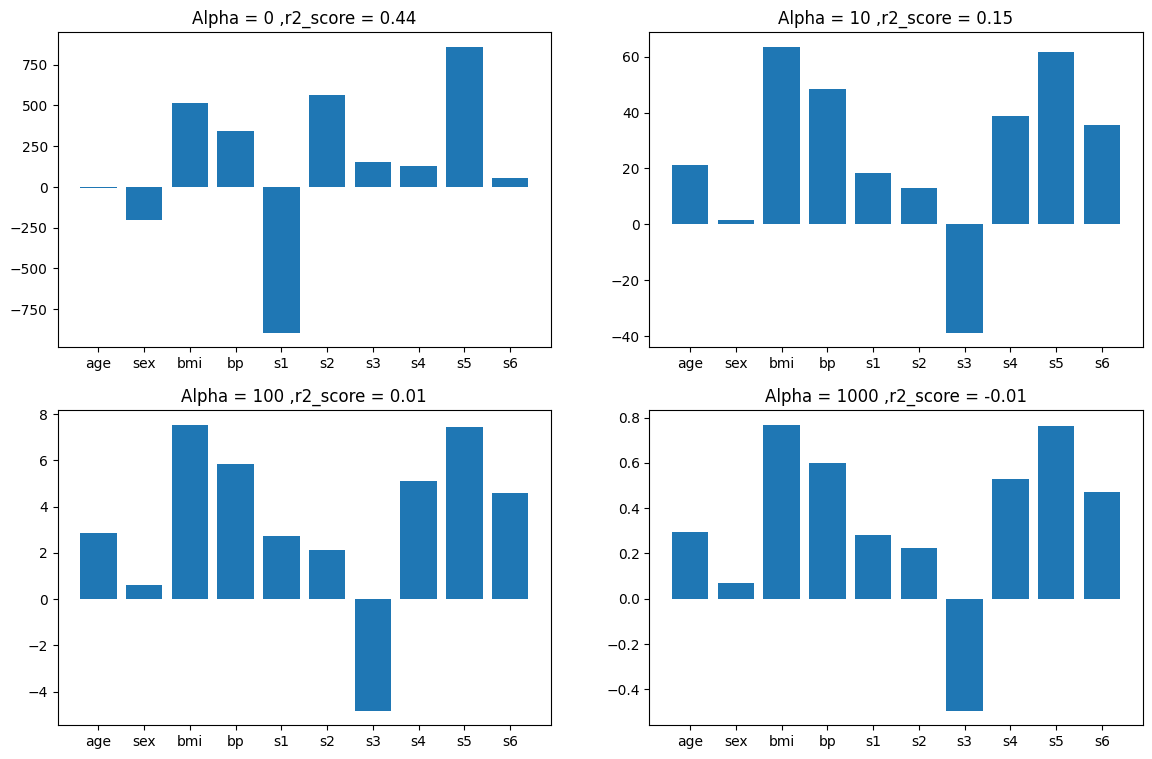

In [43]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

In [44]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

In [45]:
r2_scores

[0.43993386615689667,
 0.15214327672566985,
 0.010378115936827137,
 -0.010136670498663625,
 0.43993386615689667,
 0.4400429511552676,
 0.4408617113920028,
 0.4439392894728016,
 0.45199494197195456,
 0.4078252224517158,
 0.15214327672566985,
 0.010378115936827137,
 -0.010136670498663625,
 -0.012278558686675378]

In [46]:
input_array = np.array(coefs)

In [47]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [48]:

coefs.clear()
r2_scores.clear()
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

C:\Users\PRAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\PRAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the sol

In [49]:
r2_scores

[0.4399338662581874,
 0.4399732201362009,
 0.44030096069159674,
 0.44111855963110613,
 0.4334618007658305,
 0.3256808253711555,
 -0.012517603619692785,
 -0.012517603619692785,
 -0.012517603619692785,
 -0.012517603619692785]

In [50]:
input_array = np.array(coefs)

In [51]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [52]:
# Elastic Net regressor
ereg=ElasticNet(alpha=0.0000001,l1_ratio=0.9)
ereg.fit(X_train,y_train)

y_pred=ereg.predict(X_train)
print("R2 score",r2_score(y_train,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred)))

R2 score 0.532367222002685
RMSE 53.04916210597601


In [53]:
y_predt=ereg.predict(X_test)
print("R2 score",r2_score(y_test,y_predt))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predt)))

R2 score 0.43993782639287815
RMSE 55.62764412247573
